In [2]:
from SpectraHitran.SpectraGenerator.spectragenerator import SpectraGenerator
from SpectraHitran.SpectraProcessing.spectraprocessing import branchClassification, plotSpectrum, spectrogramFromSpectra
from SpectraHitran.SpectraFit.spectrafit import filterLine,singleLineFit, multipleLineFit

import numpy as np
from scipy.signal import spectrogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Simulando espectros e processando espectros

Inicializando
Using hitran_database


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: HCl
  65536 bytes written to hitran_database/HCl.data
  65536 bytes written to hitran_database/HCl.data
Header written to hitran_database/HCl.header
END DOWNLOAD
                     Lines parsed: 757
PROCESSED
{'air': 0, 'self': 1}
6.147972 seconds elapsed for abscoef; nlines = 757


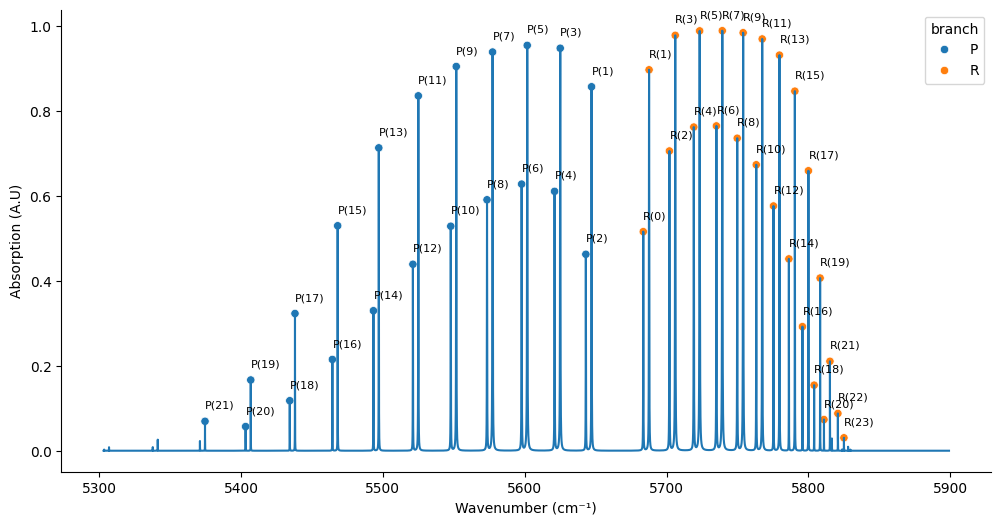

In [3]:
s = SpectraGenerator()

s.downloadMolecule('HCl', (52,53), (5300,5900))

pressure = 0.354 #atm
temperature = 293 # Kelvin

optical_length = 10 #cm

#Simulando o espectro
s.simulateSpectra('HCl',{'air':0, 'self':1}, {'l':optical_length,'p':pressure,'T':temperature})

# Organizando as linhas
lines = branchClassification(s.spectra, findPeaksParams={'height':0},thresoldBranch=5665)

lines['pressure'] = pressure
lines['temperature'] = temperature

# Realizando o fit das linhas pelo perfil de Voigt

plotSpectrum(s.spectra,lines)

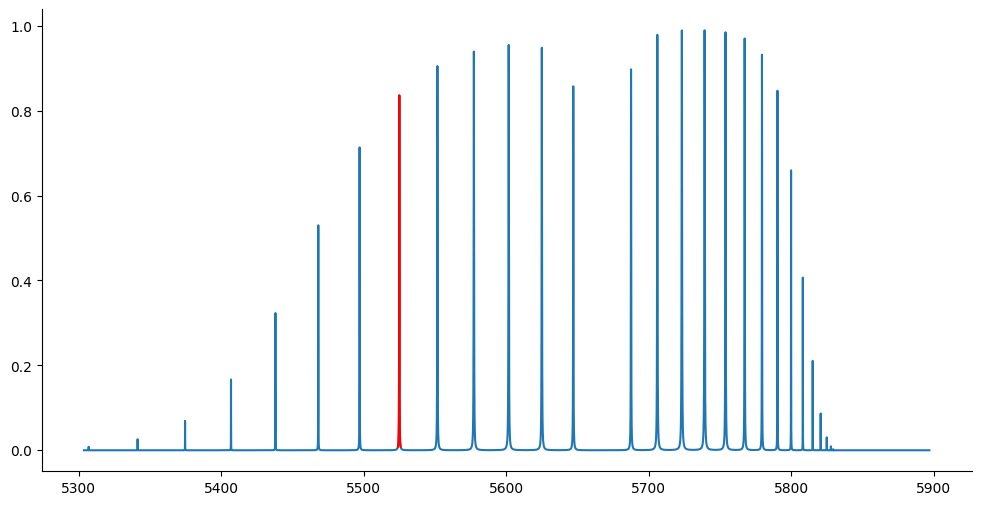

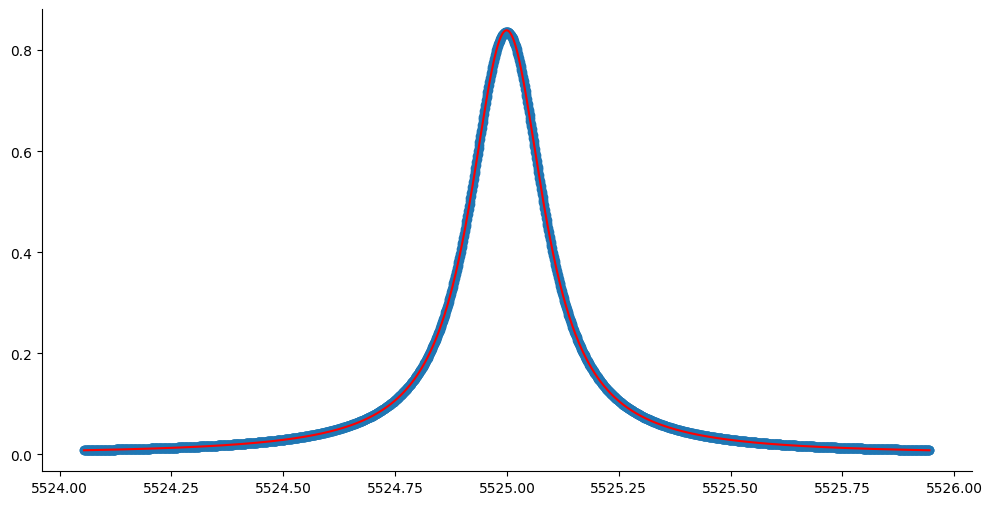

In [3]:
x,y = filterLine(s.spectra,lines.loc[5,'wavenumber'],lines.loc[5,'absorption'],0.01)

plt.plot(s.spectra['wavenumbers'],s.spectra['absorption'])
plt.plot(x,y,c='red')
plt.show()


chute= 8e-3
final, result, params, successful = singleLineFit(y, x, lines.loc[5,'wavenumber'],chute, chute, vgamma=True, vsigma=True)

plt.scatter(x=x,y=y)
plt.plot(x,final,c='red')
plt.show()
result

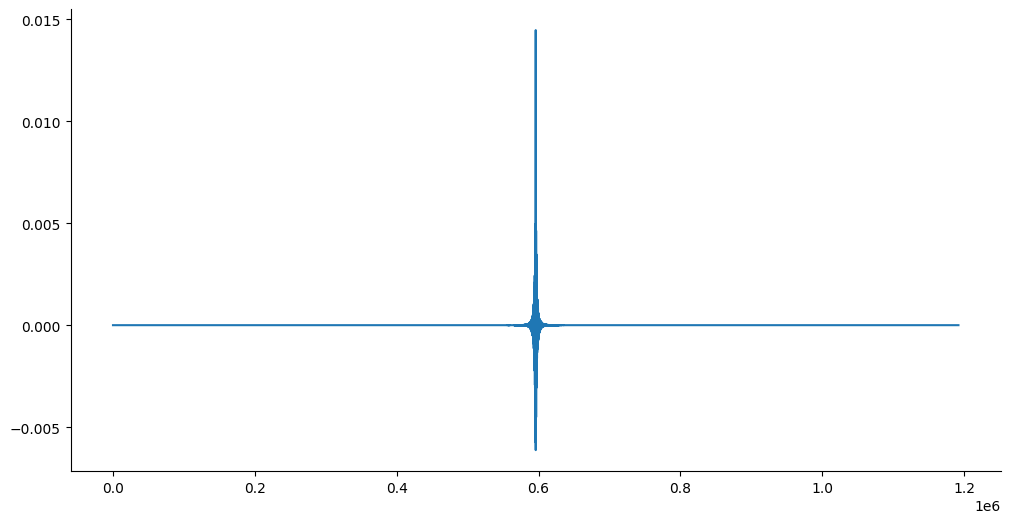

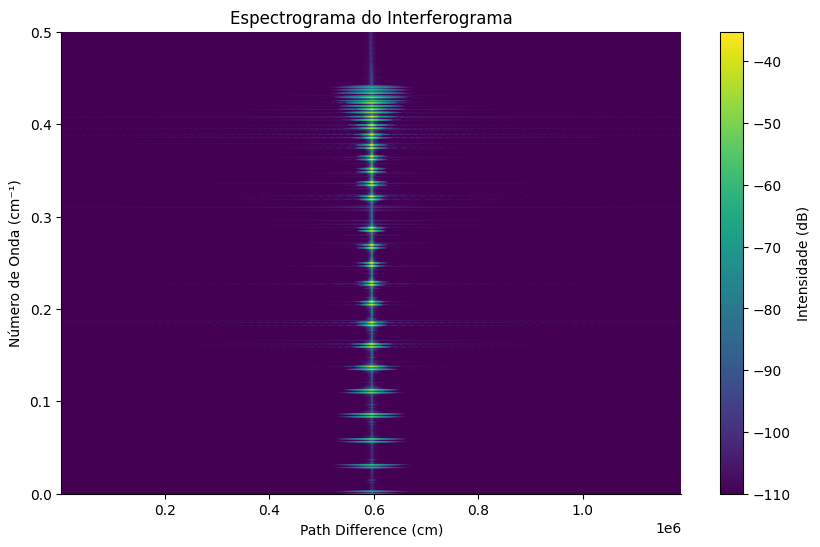

In [4]:
f, t, spec, interferogram = spectrogramFromSpectra(s.spectra)

plt.plot(interferogram)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, spec, shading='gouraud', cmap='viridis')
plt.colorbar(label='Intensidade (dB)')
plt.xlabel('Path Difference (cm)')
plt.ylabel('Número de Onda (cm⁻¹)')
plt.title('Espectrograma do Interferograma')
plt.show()

In [7]:
spectrogram(s.spectra)

AttributeError: 'dict' object has no attribute 'shape'

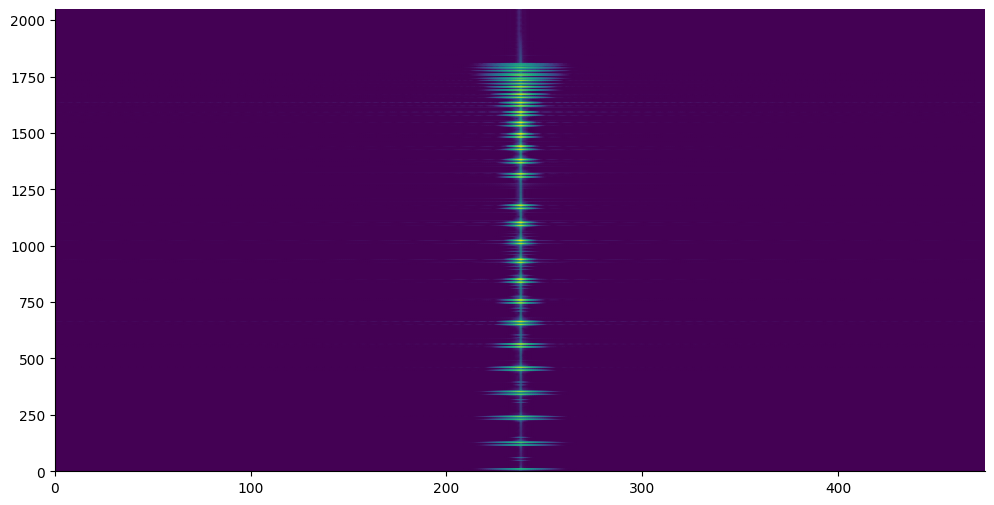

In [160]:
spec = np.load('../spectrograms/train/95_369.4063481437874_0.49621179131407506.npz')

plt.pcolormesh(spec['a'], shading='gouraud', cmap='viridis')

In [157]:
spec['a']

array([[-109.99816995, -109.99939526, -109.99854001, ..., -109.99987519,
        -109.99800143, -109.99994849],
       [-109.99844678, -109.99929945, -109.99884442, ..., -109.99982985,
        -109.99839463, -109.99947286],
       [-109.99903955, -109.99930046, -109.99945198, ..., -109.99977806,
        -109.99916635, -109.99932453],
       ...,
       [-109.99999963, -109.9999998 , -109.99999991, ..., -109.9999996 ,
        -109.99999944, -109.99999993],
       [-109.99999963, -109.9999997 , -109.99999975, ..., -109.9999997 ,
        -109.99999955, -109.99999957],
       [-109.99999962, -109.9999996 , -109.99999964, ..., -109.99999998,
        -109.99999977, -109.99999936]])